## Arm Reaching (RM Session 1)

In [1]:
import os
import glob
import numpy as np
import mne
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne.decoding import CSP
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
folder = r'converted data'
files = os.listdir(folder)
files

['Session_1_RM_Sub_10_arm_reaching_classes.fif',
 'Session_1_RM_Sub_10_rest_class.fif',
 'Session_1_RM_Sub_1_arm_reaching_classes.fif',
 'Session_1_RM_Sub_1_rest_class.fif',
 'Session_1_RM_Sub_2_arm_reaching_classes.fif',
 'Session_1_RM_Sub_2_rest_class.fif',
 'Session_1_RM_Sub_3_arm_reaching_classes.fif',
 'Session_1_RM_Sub_3_rest_class.fif',
 'Session_1_RM_Sub_4_arm_reaching_classes.fif',
 'Session_1_RM_Sub_4_rest_class.fif',
 'Session_1_RM_Sub_5_arm_reaching_classes.fif',
 'Session_1_RM_Sub_5_rest_class.fif',
 'Session_1_RM_Sub_6_arm_reaching_classes.fif',
 'Session_1_RM_Sub_6_rest_class.fif',
 'Session_1_RM_Sub_7_arm_reaching_classes.fif',
 'Session_1_RM_Sub_7_rest_class.fif',
 'Session_1_RM_Sub_8_arm_reaching_classes.fif',
 'Session_1_RM_Sub_8_rest_class.fif',
 'Session_1_RM_Sub_9_arm_reaching_classes.fif',
 'Session_1_RM_Sub_9_rest_class.fif']

In [5]:
decode = {11: 0, 21: 1, 31: 2, 41:3, 51: 4, 61: 5, 8 :6}
labels = []

data = []
for file in files:
    if file.__contains__('rest_class'):
        continue

    epochs = mne.read_epochs(os.path.join(folder,file))
    epochs.pick_types(eeg=True)

    # apply down sampling if needed
    epochs.resample(sfreq=1250)

    tmp_data = epochs.get_data()

    if data==[]:
        data = tmp_data
    else:
        data = np.concatenate((data, tmp_data), axis=0)

    for i in epochs.events:
        labels.append(decode[i[2]])


Reading d:\EEG_RawData\Arm-Reaching-RM\Multiple subjects\converted data\Session_1_RM_Sub_10_arm_reaching_classes.fif ...
    Found the data of interest:
        t =    3000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Reading d:\EEG_RawData\Arm-Reaching-RM\Multiple subjects\converted data\Session_1_RM_Sub_1_arm_reaching_classes.fif ...
    Found the data of interest:
        t =    3000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correction applied
0 projection items activated
Reading d:\EEG_RawData\Arm-Reaching-RM\Multiple subjects\converted data\Session_1_RM_Sub_2_arm_reaching_classes.fif ...
    Found the data of interest:
        t =    3000.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
300 matching events found
No baseline correctio

In [6]:
data.shape

(3000, 32, 5000)

In [7]:
labels = np.array(labels)
labels.shape

(3000,)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size = 0.2,stratify=labels,shuffle=True)

In [ ]:
# ind = np.argsort(y_train)
# y_train = y_train[ind]
# X_train = X_train[ind]

In [ ]:
# ind = np.argsort(y_val)
# y_val = y_val[ind]
# X_val = X_val[ind]

In [ ]:
# y_train=tf.keras.utils.to_categorical(y_train,num_classes=6) 
# y_val=tf.keras.utils.to_categorical(y_val,num_classes=6) 

In [9]:
print('X_train: ',X_train.shape)
print('X_val:   ',X_val.shape)
print('y_train: ',y_train.shape)
print('y_val:   ',y_val.shape)

X_train:  (2400, 32, 5000)
X_val:    (600, 32, 5000)
y_train:  (2400,)
y_val:    (600,)


In [ ]:
# Normaliation
# X_train = MinMaxScaler().fit_transform(X_train)
# X_val = MinMaxScaler().fit_transform(X_val)
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_val = (X_val-np.min(X_val))/(np.max(X_val)-np.min(X_val))

## CSP & SVM

Computing rank from data with rank=None
    Using tolerance 20 (2.2e-16 eps * 32 dim * 2.9e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 20 (2.2e-16 eps * 32 dim * 2.9e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 20 (2.2e-16 eps * 32 dim * 2.9e+15  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 20 (2.2e-16 eps * 32 dim * 2.9e+15  max singular value)
    Estimated rank (

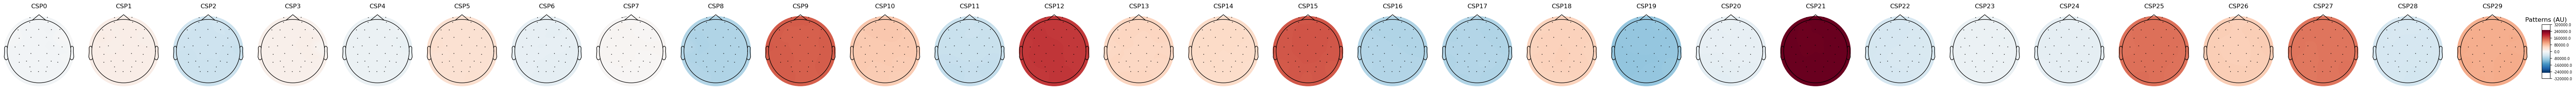

In [ ]:
csp = CSP(n_components=30, reg=None, log=True, norm_trace=False)

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(X_train, y_train)

csp.plot_patterns(epochs.info, ch_type='eeg', units='Patterns (AU)', size=1.5)

# Apply CSP transform to training data
X_train_csp = csp.transform(X_train)
X_val_csp = csp.transform(X_val)

In [ ]:
print('X_train: ',X_train_csp.shape)
print('X_val:   ',X_val_csp.shape)

In [ ]:
# ‘svd’, ‘lsqr’, ‘eigen’
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train_csp, y_train)

evaluate_train=[X_train_csp, y_train]
evaluate_test=[X_val_csp, y_val]

# model accuracy for svc model

train_accuracy = lda.score(*evaluate_train)
test_accuracy = lda.score(*evaluate_test)
print('train accuracy: ',str(train_accuracy))
print('test accuracy:  ',str(test_accuracy))

In [ ]:
# training a linear SVM classifier

svm_kernel_ovo = OneVsOneClassifier(SVC(kernel='linear', C=10)).fit(X_train_csp, y_train)
svm_kernel_ovr = OneVsRestClassifier(SVC(kernel='linear', C=10)).fit(X_train_csp, y_train)

svm_linear_ovo = OneVsOneClassifier(LinearSVC(C=10),).fit(X_train_csp, y_train)
svm_linear_ovr = OneVsRestClassifier(LinearSVC(C=10)).fit(X_train_csp, y_train)

evaluate_train=[X_train_csp, y_train]
evaluate_test=[X_val_csp, y_val]

# model accuracy for svc model
train_accuracy = svm_kernel_ovr.score(*evaluate_train)
test_accuracy = svm_kernel_ovr.score(*evaluate_test)
print('Linear Kernel OneVsRest SVM accuracy: ')
print('          train accuracy: ',str(train_accuracy))
print('          test accuracy:  ',str(test_accuracy))
print('_' * 40)

train_accuracy = svm_kernel_ovo.score(*evaluate_train)
test_accuracy = svm_kernel_ovo.score(*evaluate_test)
print('Linear Kernel OneVsOne SVM accuracy: ')
print('          train accuracy: ',str(train_accuracy))
print('          test accuracy:  ',str(test_accuracy))
print('_' * 40)

train_accuracy = svm_linear_ovr.score(*evaluate_train)
test_accuracy = svm_linear_ovr.score(*evaluate_test)
print('LinearSVC OneVsRest SVM accuracy: ')
print('          train accuracy: ',str(train_accuracy))
print('          test accuracy:  ',str(test_accuracy))
print('_' * 40)

train_accuracy = svm_linear_ovo.score(*evaluate_train)
test_accuracy = svm_linear_ovo.score(*evaluate_test)
print('LinearSVC OneVsOne SVM accuracy: ')
print('          train accuracy: ',str(train_accuracy))
print('          test accuracy:  ',str(test_accuracy))
print('_' * 40)

Linear Kernel OneVsRest SVM accuracy: 
          train accuracy:  0.22625
          test accuracy:   0.14333333333333334
________________________________________
Linear Kernel OneVsOne SVM accuracy: 
          train accuracy:  0.30833333333333335
          test accuracy:   0.15833333333333333
________________________________________
LinearSVC OneVsRest SVM accuracy: 
          train accuracy:  0.26125
          test accuracy:   0.13833333333333334
________________________________________
LinearSVC OneVsOne SVM accuracy: 
          train accuracy:  0.29083333333333333
          test accuracy:   0.15333333333333332
________________________________________


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                         algorithm="SAMME",
                         n_estimators=100)
error = []

clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X_train_csp,y_train)
y_prediction = clf.predict(X_val_csp)
accuracy=np.mean(y_prediction == y_val)*100
print ("The achieved accuracy using Decision Tree is " + str(accuracy))

bdt.fit(X_train_csp,y_train)
y_prediction = bdt.predict(X_val_csp)
accuracy=np.mean(y_prediction == y_val)*100
print ("The achieved accuracy using Adaboost is " + str(accuracy))